# SageMaker End to End Solutions: Fraud Detection for Automobile Claims

<a id='overview-0'></a>

## [Overview](./0-AutoClaimFraudDetection.ipynb)
* **[Notebook 0 : Overview, Architecture, and Data Exploration](./0-AutoClaimFraudDetection.ipynb)**
  * **[Business Problem](#business-problem)**
  * **[Technical Solution](#nb0-solution)**
  * **[Solution Components](#nb0-components)**
  * **[Solution Architecture](#nb0-architecture)**
  * **[DataSets and Exploratory Data Analysis](#nb0-data-explore)**
  * **[Exploratory Data Science and Operational ML workflows](#nb0-workflows)**
  * **[The ML Life Cycle: Detailed View](#nb0-ml-lifecycle)**
* [Notebook 1: Data Prep, Process, Store Features](./1-data-prep-e2e.ipynb)
  * Architecture
  * Getting started
  * DataSets
  * SageMaker Feature Store
  * Create train and test datasets
* [Notebook 2: Train, Check Bias, Tune, Record Lineage, and Register a Model](./2-lineage-train-assess-bias-tune-registry-e2e.ipynb)
  * Architecture
  * Train a model using XGBoost
  * Model lineage with artifacts and associations
  * Evaluate the model for bias with Clarify
  * Deposit Model and Lineage in SageMaker Model Registry
* [Notebook 3: Mitigate Bias, Train New Model, Store in Registry](./3-mitigate-bias-train-model2-registry-e2e.ipynb)
  * Architecture
  * Develop a second model
  * Analyze the Second Model for Bias
  * View Results of Clarify Bias Detection Job
  * Configure and Run Clarify Explainability Job
  * Create Model Package for second trained model
* [Notebook 4: Deploy Model, Run Predictions](./4-deploy-run-inference-e2e.ipynb)
  * Architecture
  * Deploy an approved model and Run Inference via Feature Store
  * Create a Predictor
  * Run  Predictions from Online FeatureStore
* [Notebook 5 : Create and Run an End-to-End Pipeline to Deploy the Model](./5-pipeline-e2e.ipynb)
  * Architecture
  * Create an Automated Pipeline
  * Clean up

## Overview, Architecture, and Data Exploration

In this overview notebook, we will address business problems regarding auto insurance fraud, technical solutions, explore dataset, solution architecture, and scope the machine learning (ML) life cycle.

<a id='business-problem'> </a>

## Business Problem

[overview](#overview-0)

<i> "Auto insurance fraud ranges from misrepresenting facts on insurance applications and inflating insurance claims to staging accidents and submitting claim forms for injuries or damage that never occurred, to false reports of stolen vehicles.
Fraud accounted for between 15 percent and 17 percent of total claims payments for auto insurance bodily injury in 2012, according to an Insurance Research Council (IRC) study. The study estimated that between $\$5.6$ billion and $\$7.7$ billion was fraudulently added to paid claims for auto insurance bodily injury payments in 2012, compared with a range of $\$4.3$ billion to $\$5.8$ billion in 2002. </i>" [source: Insurance Information Institute](https://www.iii.org/article/background-on-insurance-fraud)

In this example, we will use an *auto insurance domain* to detect claims that are possibly fraudulent.  
more precisley we address the use-case: <i> "what is the likelihood that a given autoclaim is fraudulent?" </i>, and explore the technical solution.  

As you review the [notebooks](#nb0-notebooks) and the [architectures](#nb0-architecture) presented at each stage of the ML life cycle, you will see how you can leverage SageMaker services and features to enhance your effectiveness as a data scientist, as a machine learning engineer, and as an ML Ops Engineer.

We will then do [data exploration](#nb0-data-explore) on the synthetically generated datasets for Customers and Claims.

Then, we will provide an overview of the technical solution by examining the [Solution Components](#nb0-components) and the [Solution Architecture](#nb0-architecture).
We will be motivated by the need to accomplish new tasks in ML by examining a [detailed view of the Machine Learning Life-cycle](#nb0-ml-lifecycle), recognizing the [separation of exploratory data science and operationalizing an ML worklfow](#nb0-workflows).


### Car Insurance Claims: Data Sets and Problem Domain

The inputs for building our model and workflow are two tables of insurance data: a claims table and a customers table. This data was synthetically generated is provided to you in its raw state for pre-processing with SageMaker Data Wrangler. However, completing the Data Wragnler step is not required to continue with the rest of this notebook. If you wish, you may use the `claims_preprocessed.csv` and `customers_preprocessed.csv` in the `data` directory as they are exact copies of what Data Wragnler would output.

<a id ='nb0-solution'> </a>

## Technical Solution
[overview](#overview-0)

In this introduction, you will look at the technical architecture and solution components to build a solution for predicting fraudulent insurance claims and deploy it using SageMaker for real-time predictions. While a deployed model is the end-product of this notebook series, the purpose of this guide is to walk you through all the detailed stages of the [machine learning (ML) lifecycle](#ml-lifecycle) and show you what SageMaker servcies and features are there to support your activities in each stage.

**Topics**
- [Solution Components](#nb0-components)
- [Solution Architecture](#nb0-architecture)
- [Code Resources](#nb0-code)
- [ML lifecycle details](#nb0-ml-lifecycle)
- [Manual/exploratory and automated workflows](#nb0-workflows) 

<a id ='nb0-components'> </a>

## Solution Components
[overview](#overview-0)
    
The following [SageMaker](https://sagemaker.readthedocs.io/en/stable/v2.html) Services are used in this solution:

 1. [SageMaker DataWrangler](https://aws.amazon.com/sagemaker/data-wrangler/) - [docs](https://docs.aws.amazon.com/sagemaker/latest/dg/data-wrangler.html)
 1. [SageMaker Processing](https://aws.amazon.com/blogs/aws/amazon-sagemaker-processing-fully-managed-data-processing-and-model-evaluation/) - [docs](https://sagemaker.readthedocs.io/en/stable/amazon_sagemaker_processing.html)
 1. [SageMaker Feature Store](https://aws.amazon.com/sagemaker/feature-store/)- [docs](https://sagemaker.readthedocs.io/en/stable/amazon_sagemaker_featurestore.html)
 1. [SageMaker Clarify](https://aws.amazon.com/sagemaker/clarify/)- [docs](https://docs.aws.amazon.com/sagemaker/latest/dg/clarify-processing-job-run.html)
 1. [SageMaker Training with XGBoost Algorithm and Hyperparameter Optimization](https://sagemaker.readthedocs.io/en/stable/frameworks/xgboost/using_xgboost.html)- [docs](https://sagemaker.readthedocs.io/en/stable/frameworks/xgboost/index.html)
 1. [SageMaker Model Registry](https://docs.aws.amazon.com/sagemaker/latest/dg/model-registry.html)- [docs](https://docs.aws.amazon.com/sagemaker/latest/dg/model-registry-deploy.html#model-registry-deploy-api)
 1. [SageMaker Hosted Endpoints]()- [predictors - docs](https://sagemaker.readthedocs.io/en/stable/api/inference/predictors.html)
 1. [SageMaker Pipelines]()- [docs](https://sagemaker.readthedocs.io/en/stable/workflows/pipelines/index.html)

![Solution Components](images/solution-components-e2e.png)

<a id ='nb0-data-explore'> </a>

## DataSets and Exploratory Visualizations
[overview](#overview-0)

The dataset is synthetically generated and consists of <font color='green'> customers and claims </font> datasets.
Here we will load them and do some exploratory visualizations.

In [1]:
!pip install seaborn==0.11.1

You should consider upgrading via the '/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.8/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns  # visualisation
import matplotlib.pyplot as plt  # visualisation

%matplotlib inline
sns.set(color_codes=True)

df_claims = pd.read_csv("./data/claims_preprocessed.csv", index_col=0)
df_customers = pd.read_csv("./data/customers_preprocessed.csv", index_col=0)

In [3]:
print(df_claims.isnull().sum().sum())
print(df_customers.isnull().sum().sum())

0
0


This should return no null values in both of the datasets.

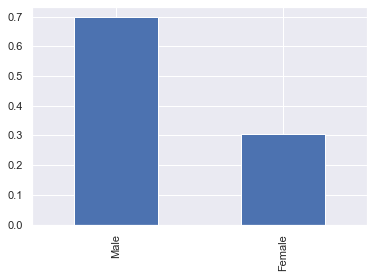

In [4]:
# plot the bar graph customer gender
df_customers.customer_gender_female.value_counts(normalize=True).plot.bar()
plt.xticks([0, 1], ["Male", "Female"])

The dataset is heavily weighted towards male customers.

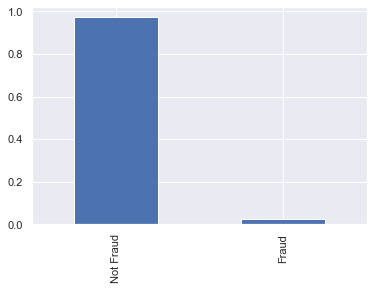

In [5]:
# plot the bar graph of fraudulent claims
df_claims.fraud.value_counts(normalize=True).plot.bar()
plt.xticks([0, 1], ["Not Fraud", "Fraud"])

The overwhemling majority of claims are legitimate (i.e. not fraudulent).

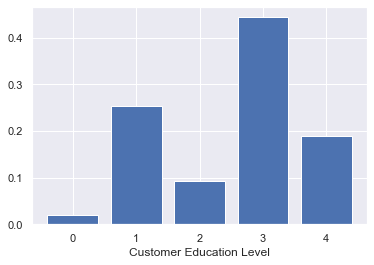

In [6]:
# plot the education categories
educ = df_customers.customer_education.value_counts(normalize=True, sort=False)
plt.bar(educ.index, educ.values)
plt.xlabel("Customer Education Level");

Text(0.5, 0, 'Total Claim Amount')

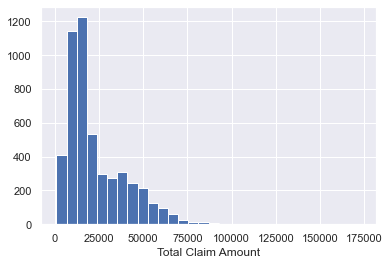

In [7]:
# plot the total claim amounts
plt.hist(df_claims.total_claim_amount, bins=30)
plt.xlabel("Total Claim Amount")

Majority of the total claim amounts are under $25,000.

Text(0.5, 0, 'Number of claims per year')

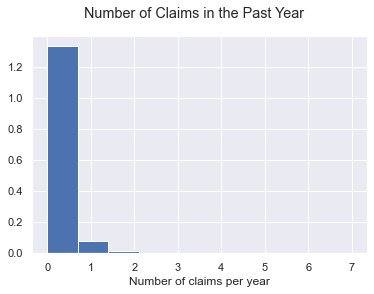

In [8]:
# plot the number of claims filed in the past year
df_customers.num_claims_past_year.hist(density=True)
plt.suptitle("Number of Claims in the Past Year")
plt.xlabel("Number of claims per year")

Most customers did not file any claims in the previous year, but some filed as many as 7 claims.

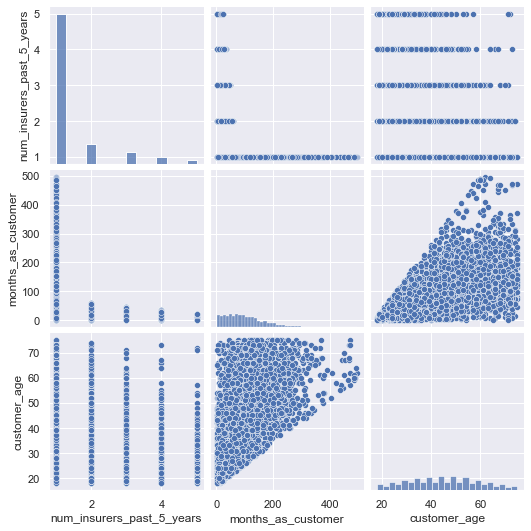

In [9]:
sns.pairplot(
    data=df_customers,
    vars=["num_insurers_past_5_years", "months_as_customer", "customer_age"],
);

Understandably, the `months_as_customer` and `customer_age` are correlated with each other. A younger person have been driving for a smaller amount of time and therefore have a smaller potential for how long they might have been a customer.

We can also see that the `num_insurers_past_5_years` is negatively correlated with `months_as_customer`. If someone frequently jumped around to different insurers, then they probably spent less time as a customer of this insurer.

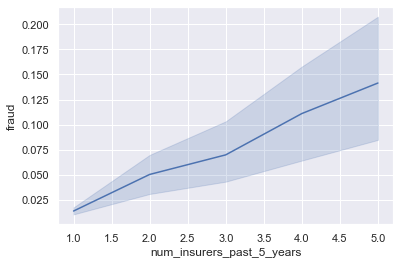

In [10]:
df_combined = df_customers.join(df_claims)
sns.lineplot(x="num_insurers_past_5_years", y="fraud", data=df_combined);

Fraud is positively correlated with having a greater number of insurers over the past 5 years. Customers who switched insurers more frequently also had more prevelance of fraud.

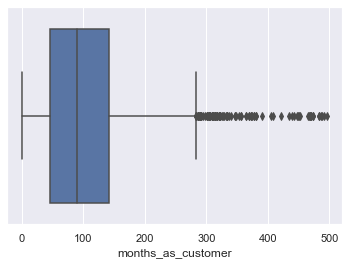

In [11]:
sns.boxplot(x=df_customers["months_as_customer"]);

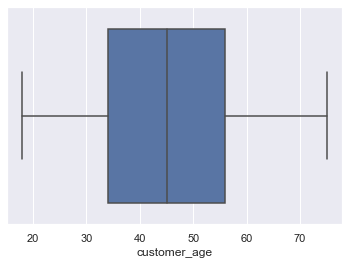

In [12]:
sns.boxplot(x=df_customers["customer_age"]);

Our customers range from 18 to 75 years old. 

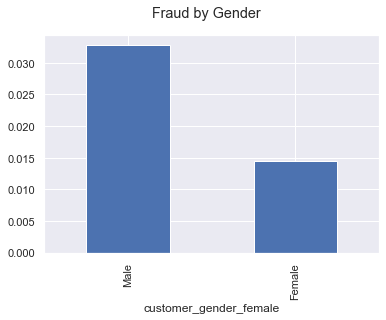

In [13]:
df_combined.groupby("customer_gender_female").mean()["fraud"].plot.bar()
plt.xticks([0, 1], ["Male", "Female"])
plt.suptitle("Fraud by Gender");

Fraudulent claims come disproportionately from male customers.

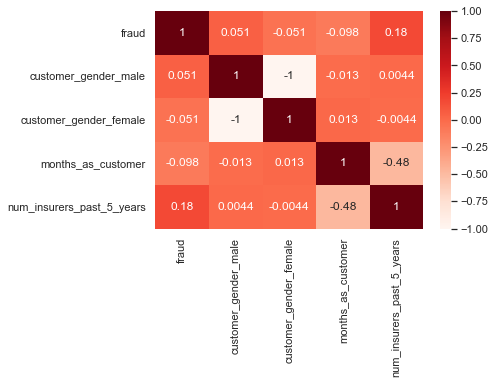

In [14]:
# Creating a correlation matrix of fraud, gender, months as customer, and number of different insurers
cols = [
    "fraud",
    "customer_gender_male",
    "customer_gender_female",
    "months_as_customer",
    "num_insurers_past_5_years",
]
corr = df_combined[cols].corr()

# plot the correlation matrix
sns.heatmap(corr, annot=True, cmap="Reds");

Fraud is correlated with having more insurers in the past 5 years, and negatively correlated with being a customer for a longer period of time. These go hand in hand and mean that long time customers are less likely to commit fraud.

### Combined DataSets

We have been looking at the indivudual datasets, now let's look at their combined view (join).

In [15]:
import pandas as pd

df_combined = pd.read_csv("./data/claims_customer.csv")

In [16]:
df_combined = df_combined.loc[:, ~df_combined.columns.str.contains("^Unnamed: 0")]
# get rid of an unwanted column
df_combined.head()

,policy_id,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,policy_state_id,incident_hour,vehicle_claim,fraud,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
0,1675,0,0,750,0,0,2,0,1,0,...,0,20,12000.0,0,0,3000,1,0,0,0
1,9,0,0,750,0,0,9,0,1,1,...,0,15,18500.0,0,1,3000,0,0,0,0
2,1687,0,1,750,0,0,7,1,1,0,...,0,16,17500.0,0,1,3000,0,0,0,0
3,1687,0,1,750,0,0,7,0,1,1,...,0,16,17500.0,0,1,3000,0,0,0,0
4,1692,0,0,750,2,0,6,1,1,0,...,0,8,21500.0,0,1,2800,1,0,0,1


In [17]:
df_combined.describe()

,policy_id,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,policy_state_id,incident_hour,vehicle_claim,fraud,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
count,20000.00000,20000.000000,20000.0000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2500.50000,0.048200,0.6204,751.13000,0.866100,0.070000,6.713200,0.372400,1.412200,0.576500,...,0.02730,11.786800,17426.083700,0.030000,0.857200,2925.400000,0.113600,0.121000,0.220900,0.425400
std,1443.41173,0.214194,0.4853,13.57322,1.097921,0.255153,3.654396,0.483456,0.897291,0.494125,...,0.16296,5.337918,10043.773599,0.170591,0.349878,143.516096,0.317333,0.326135,0.414864,0.494416
min,1.00000,0.000000,0.0000,750.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1000.000000,0.000000,0.000000,2150.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.75000,0.000000,0.0000,750.00000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,...,0.00000,8.000000,10474.250000,0.000000,1.000000,2900.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.50000,0.000000,1.0000,750.00000,0.000000,0.000000,7.000000,0.000000,1.000000,1.000000,...,0.00000,12.000000,15000.000000,0.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,0.000000
75%,3750.25000,0.000000,1.0000,750.00000,2.000000,0.000000,10.000000,1.000000,1.000000,1.000000,...,0.00000,16.000000,22005.500000,0.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,1.000000
max,5000.00000,1.000000,1.0000,1100.00000,5.000000,1.000000,12.000000,1.000000,5.000000,1.000000,...,1.00000,23.000000,51051.000000,1.000000,1.000000,3000.000000,1.000000,1.000000,1.000000,1.000000


Let's explore any unique, missing, or large percentage category in the combined dataset.

In [18]:
combined_stats = []


for col in df_combined.columns:
    combined_stats.append(
        (
            col,
            df_combined[col].nunique(),
            df_combined[col].isnull().sum() * 100 / df_combined.shape[0],
            df_combined[col].value_counts(normalize=True, dropna=False).values[0] * 100,
            df_combined[col].dtype,
        )
    )

stats_df = pd.DataFrame(
    combined_stats,
    columns=[
        "feature",
        "unique_values",
        "percent_missing",
        "percent_largest_category",
        "datatype",
    ],
)
stats_df.sort_values("percent_largest_category", ascending=False)

,feature,unique_values,percent_missing,percent_largest_category,datatype
3,policy_deductable,8,0.0,98.94,int64
28,authorities_contacted_ambulance,2,0.0,97.45,int64
37,policy_state_id,2,0.0,97.27,int64
35,authorities_contacted_fire,2,0.0,97.20,int64
40,fraud,2,0.0,97.00,int64
36,driver_relationship_other,2,0.0,96.06,int64
16,driver_relationship_child,2,0.0,95.49,int64
27,policy_state_nv,2,0.0,95.23,int64
1,incident_type_theft,2,0.0,95.18,int64
23,num_claims_past_year,8,0.0,93.28,int64


<ipython-input-19-eac7c0621a6c>:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


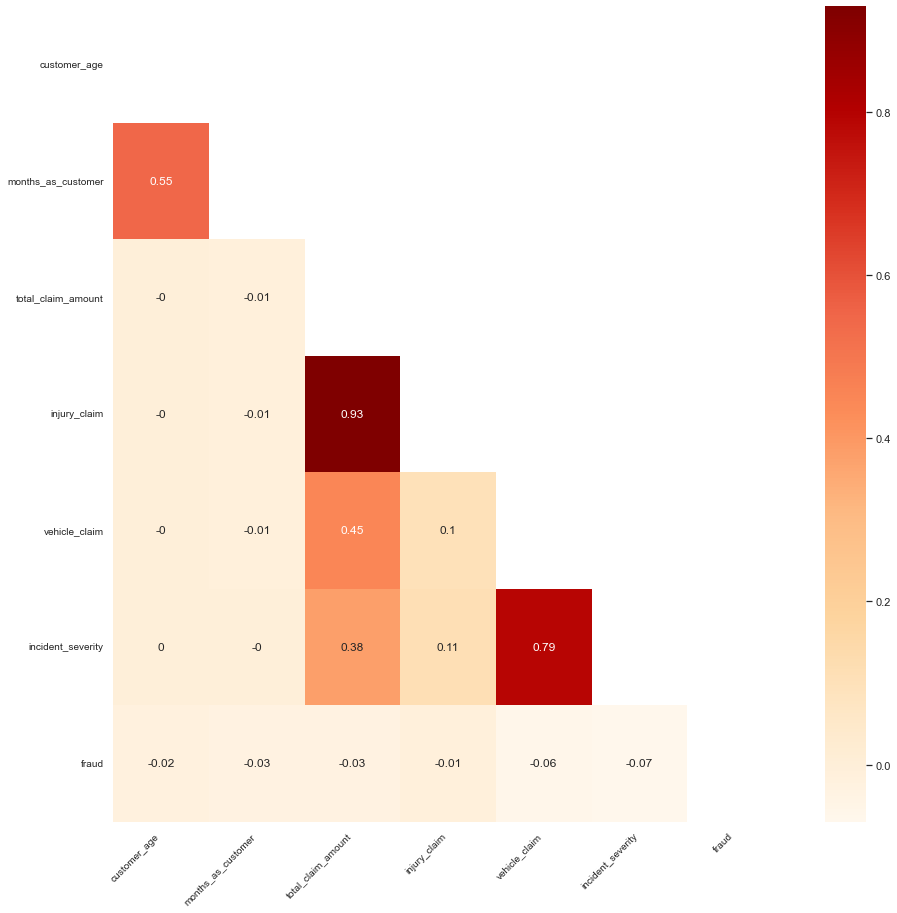

In [19]:
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("white")

corr_list = [
    "customer_age",
    "months_as_customer",
    "total_claim_amount",
    "injury_claim",
    "vehicle_claim",
    "incident_severity",
    "fraud",
]

corr_df = df_combined[corr_list]
corr = round(corr_df.corr(), 2)

fix, ax = plt.subplots(figsize=(15, 15))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap="OrRd")

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha="right", rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

plt.show()

<a id ='nb0-architecture'> </a>

## Solution Architecture
[overview](#overview-0)

We will go through 5 stages of ML and explore the solution architecture of SageMaker. Each of the sequancial notebooks will dive deep into corresponding ML stage.

<a id ='nb0-data-prep'> </a>

### [Notebook 1](./1-data-prep-e2e.ipynb): Data Preparation, Ingest, Transform, Preprocess, and Store in SageMaker Feature Store
[overview](#nb0-solution)

![Solution Architecture](images/e2e-1-pipeline-v3b.png)



<a id ='nb0-train-store'> </a>

### [Notebook 2](./2-lineage-train-assess-bias-tune-registry-e2e.ipynb) and [Notebook 3](./3-mitigate-bias-train-model2-registry-e2e.ipynb) :   Train, Tune, Check Pre- and Post- Training Bias, Mitigate Bias, Re-train, and Deposit the Best Model to SageMaker Model Registry
[overview](#nb0-solution)

![Solution Architecture](images/e2e-2-pipeline-v3b.png)

<a id ='nb0-deploy-predict'> </a>

### [Notebooks 4](./4-deploy-run-inference-e2e.ipynb) :   Load the Best Model from Registry, Deploy it to SageMaker Hosted Endpoint, and Make Predictions
[overview](#nb0-solution)

![Solution Architecture](images/e2e-3-pipeline-v3b.png)

<a id ='nb0-pipeline'> </a>

### [Notebooks 5](./5-pipeline-e2e.ipynb): End-to-End Pipeline - MLOps Pipeline to run an end-to-end automated workflow with all the design decisions made during manual/exploratory steps in previous notebooks.
[overview](#nb0-solution)   

![Notebook5 Pipelines](images/e2e-5-pipeline-v3b.png)

<a id ='nb0-code'> </a>

## Code Resources

[overview](#nb0-solution)

### Stages

Our solution is split into the following stages of the [ML Lifecycle](#nb0-ml-lifecycle), and each stage has it's own notebook:

* [Use-case and Architecture](./0-AutoClaimFraudDetection.ipynb): We take a high-level look at the use-case, solution components and architecture.
* [Data Prep and Store](./1-data-prep-e2e.ipynb): We prepare a dataset for machine learning using SageMaker DataWrangler, create and deposit the datasets in a SageMaker FeatureStore. [--> Architecture](#nb0-data-prep)
* [Train, Assess Bias, Establish Lineage, Register Model](./2-lineage-train-assess-bias-tune-registry-e2e.ipynb): We detect possible pre-training and post-training bias, train and tune a XGBoost model using Amazon SageMaker, record Lineage in the Model Registry so we can later deploy it. [--> Architecture](#nb0-train-store)
* [Mitigate Bias, Re-train, Register New Model](./3-mitigate-bias-train-model2-registry-e2e.ipynb): We mitigate bias, retrain a less biased model, store it in a Model Registry.  [--> Architecture](#nb0-train-store)
* [Deploy and Serve](./4-deploy-run-inference-e2e.ipynb): We deploy the model to a Amazon SageMaker Hosted Endpoint and run realtime inference via the SageMaker Online Feature Store . [--> Architecture](#nb0-deploy-predict)
* [Create and Run an MLOps Pipeline](./5-pipeline-e2e.ipynb): We then create a SageMaker Pipeline that ties together everything we have done so far, from outputs from Data Wrangler, Feature Store, Clarify , Model Registry and finally deployment to a SageMaker Hosted Endpoint. [--> Architecture](#nb0-pipeline)
* [Conclusion](./6-conclusion-e2e.ipynb): We wrap things up and discuss how to clean up the solution.

<a id ='nb0-workflows'> </a>

## The Exploratory Data Science and ML Ops Workflows

[overview](#overview-0)

### Exploratory Data Science and Scalable MLOps

Note that there are typically two workflows: a manual exploratory workflow and an automated workflow. 

The *exploratory, manual data science workflow* is where experiments are conducted and various techniques and strategies are tested. 

After you have established your data prep, transformations, featurizations and training algorithms, testing of various hyperparameters for model tuning, you can start with the automated workflow where you *rely on MLOps or the ML Engineering part of your team* to streamline the process, make it more repeatable and scalable by putting it into an automated pipeline. 

![the 2 flows](images/2-flows.png)

<a id ='nb0-ml-lifecycle'></a>

## The ML Life Cycle: Detailed View
[overview](#overview-0)

![title](images/ML-Lifecycle-v5.png)

The Red Boxes and Icons represent comparatively newer concepts and tasks that are now deemed important to include and execute, in a production-oriented (versus research-oriented) and scalable ML lifecycle.

 These newer lifecycle tasks and their corresponding, supporting AWS Services and features include:

1. [*Data Wrangling*](): AWS Data Wrangler for cleaning, normalizing, transforming and encoding data, as well as join ing datasets. The outputs of Data Wrangler are code generated to work with SageMaker Processing, SageMaker Pipelines, SageMaker Feature Store or just a plain old python script with pandas,
    1. Feature Engineering has always been done, but now with AWS Data Wrangler we can use a GUI based tool to do so and generate code for the next phases of the life-cycle.
2. [*Detect Bias*](): Using AWS Clarify, in Data Prep or in Training we can detect pre-training and post-training bias, and eventually at Inference time provide Interpretability / Explainability of the inferences (e.g., which factors were most influential in coming up with the prediction)
3. [*Feature Store [Offline]*](): Once we have done all of our feature engineering, the encoding and transformations, we can then standardize features, offline in AWS Feature Store, to be used as input features for training models.
4. [*Artifact Lineage*](): Using AWS SageMaker’s Artifact Lineage features we can associate all the artifacts (data, models, parameters, etc.) with a trained model to produce meta data that can be stored in a Model Registry.
5. [*Model Registry*](): AWS Model Registry stores the meta data around all artifacts that you have chosen to include in the process of creating your models, along with the model(s) themselves in a Model Registry. Later a human approval can be used to note that the model is good to be put into production. This feeds into the next phase of deploy and monitor .
6. [*Inference and the Online Feature Store*](): For realtime inference, we can leverage a online AWS Feature Store we have created to get us single digit millisecond low latency and high throughput for serving our model with new incoming data.
7. [*Pipelines*]():  Once we have experimented and decided on the various options in the lifecycle (which transforms to apply to our features, imbalance or bias in the data, which algorithms to choose to train with, which hyper-parameters are giving us the best performance metrics, etc.) we can now automate the various tasks across the lifecycle using SageMaker Pipelines. 
    1. In this blog, we will show a pipeline that starts with the outputs of AWS Data Wrangler and ends with storing trained models in the Model Registry. 
    2. Typically, you could have a pipeline for data prep, one for training until model registry (which we are showing in the code associated with this blog) , one for inference, and one for re-training using SageMaker Monitor to detect model drift and data drift and trigger a re-training using , say an AWS Lambda function.



[overview](#overview-0)

___

### Next Notebook: [Data Preparation, Process, and Store Features](./1-data-prep-e2e.ipynb)